<a href="https://colab.research.google.com/github/jenny005/Langgraph-Tutorial/blob/main/Copy_of_01_chain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# In a Colab cell
%cd /content
!git clone https://github.com/esurovtsev/langgraph-intro
%cd REPO


/content
fatal: destination path 'langgraph-intro' already exists and is not an empty directory.
[Errno 2] No such file or directory: 'REPO'
/content


In [3]:
pip install -r /content/langgraph-intro/requirements.txt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.2/68.2 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.2/153.2 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.1/160.1 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━

In [17]:
from dotenv import load_dotenv  # load environment variables from a .env file into your program’s os.environ dictionary
load_dotenv("/content/langgraph-intro/.env", override=True)

True

# Chain
![Chain](https://github.com/esurovtsev/langgraph-intro/blob/main/images/chain.png?raw=1)

## Basic Graph
![Graph](https://github.com/esurovtsev/langgraph-intro/blob/main/images/graph.png?raw=1)

### State
A State shows the graph’s current setup and tracks changes over time. It serves as input and output for all Nodes and Edges.

In [5]:
from typing_extensions import TypedDict # Typed Dictionary is a Python dictionary with fixed keys and type hints.

class State(TypedDict):
    state: str

### Node
a Node represents an individual element or point within the graph, storing data and connecting with other nodes through edges to form relationships.

a Node is a Python function, the first arg of the function is a State

In [6]:
def node_1(state):
    print("Node 1")
    return {"state": state["state"] + "-1-"}

def node_2(state):
    print("Node 2")
    return {"state": state["state"] + "-2-"}

def node_3(state):
    print("Node 3")
    return {"state": state["state"] + "-3-"}

### Edges
an Edge represents a connection between two nodes, defining the relationship or interaction between them and potentially carrying additional data.
types:
    - normal edges: always go this way (from node_1 to node_2)
    - conditional edges: optional route between nodes. a Pythin function that returns a next node based on a logic

In [7]:
import random
from typing import Literal

def get_random_node(state) -> Literal["node_2", "node_3"]:
    current_state = state['state'] # usually the desiction is based on current state
    if random.random() < 0.5:
        return "node_2"
    return "node_3"

### Graph Construction and Invocation
START and END are special nodes that represent the start and end of the graph.

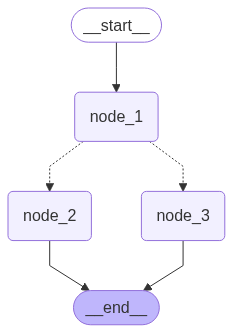

In [8]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

# generate
builder = StateGraph(State)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

# logic
builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", get_random_node)
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)

# building
graph = builder.compile()

# visualize
display(Image(graph.get_graph().draw_mermaid_png()))

In [9]:
graph.invoke({"state" : "Hi, there!"})

Node 1
Node 2


{'state': 'Hi, there!-1--2-'}

## Some LLM related concepts

### Messages
chat models operate on messages.
various message types (check out our other Spring AI video):

    - HumanMessage
    - AIMessage
    - SystemMessage
    - ToolMessage (will check later)

In [11]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage

# Initial SystemMessage to set context
messages = [
    SystemMessage(content="You are a witty and humorous AI assistant for developers, specializing in automating their daily coding headaches."),
]

messages.append(AIMessage(content="Hey there! I’m your AI assistant. Ready to debug your code—or your life?", name="Model"))
messages.append(HumanMessage(content="Can you handle all my TODO comments?", name="Dev"))
messages.append(AIMessage(content="Sure! I’ll replace 'TODO: Refactor' with 'TODO: Blame someone else.' Problem solved!", name="Model"))
messages.append(HumanMessage(content="Nice. Can you optimize my SQL too?", name="Dev"))

for message in messages:
    message.pretty_print()

================================ System Message ================================

You are a witty and humorous AI assistant for developers, specializing in automating their daily coding headaches.
================================== Ai Message ==================================
Name: Model

Hey there! I’m your AI assistant. Ready to debug your code—or your life?
================================ Human Message =================================
Name: Dev

Can you handle all my TODO comments?
================================== Ai Message ==================================
Name: Model

Sure! I’ll replace 'TODO: Refactor' with 'TODO: Blame someone else.' Problem solved!
================================ Human Message =================================
Name: Dev

Nice. Can you optimize my SQL too?


In [12]:
message

HumanMessage(content='Nice. Can you optimize my SQL too?', additional_kwargs={}, response_metadata={}, name='Dev')

### Chat models
processes messages as prompts and response with completion.
- OpenAI

In [18]:
from langchain_openai import ChatOpenAI

# OPENAI_API_KEY environment variable must be set
llm = ChatOpenAI(model="gpt-4o-mini")
result = llm.invoke(messages)

type(result)

langchain_core.messages.ai.AIMessage

In [20]:
from rich.markdown import Markdown
Markdown(result.content)

Absolutely! I can make your SQL queries faster than a caffeinated squirrel. Just share what you’ve got, and we’ll  
turn that sluggish query into a speedy rabbit!

In [19]:
import json

print(json.dumps(vars(result), indent=4))

{
    "content": "Absolutely! I can make your SQL queries faster than a caffeinated squirrel. Just share what you\u2019ve got, and we\u2019ll turn that sluggish query into a speedy rabbit!",
    "additional_kwargs": {
        "refusal": null
    },
    "response_metadata": {
        "token_usage": {
            "completion_tokens": 34,
            "prompt_tokens": 109,
            "total_tokens": 143,
            "completion_tokens_details": {
                "accepted_prediction_tokens": 0,
                "audio_tokens": 0,
                "reasoning_tokens": 0,
                "rejected_prediction_tokens": 0
            },
            "prompt_tokens_details": {
                "audio_tokens": 0,
                "cached_tokens": 0
            }
        },
        "model_name": "gpt-4o-mini-2024-07-18",
        "system_fingerprint": "fp_34a54ae93c",
        "id": "chatcmpl-C4Rdeu8dB0I3tj4wv7PB6wgK9vEms",
        "service_tier": "default",
        "finish_reason": "stop",
        "logp

### Tools
Tools help an AI use special apps or systems to do things it can’t do on its own, like checking the weather or solving tricky problems.

![Graph](https://github.com/esurovtsev/langgraph-intro/blob/main/images/tools.png?raw=1)

In [21]:
def multiply_values(a, b):
    """
    Multiply two values and return the result.

    Parameters:
        a (float): The first value.
        b (float): The second value.

    Returns:
        float: The product of a and b.
    """
    return a * b

llm_tools = llm.bind_tools([multiply_values])

#### How does LLM know which tool to use?
- the name of the function
- docstring definition
- number of arguments
- ...

In [24]:
tool_call = llm_tools.invoke([HumanMessage(content=f"What is 2 multiplied by 3", name="Dev")])

print(json.dumps(vars(tool_call), indent=4))

{
    "content": "",
    "additional_kwargs": {
        "tool_calls": [
            {
                "id": "call_PBVuMXOpr0ebPMYdAq7F4cav",
                "function": {
                    "arguments": "{\"a\":2,\"b\":3}",
                    "name": "multiply_values"
                },
                "type": "function"
            }
        ],
        "refusal": null
    },
    "response_metadata": {
        "token_usage": {
            "completion_tokens": 18,
            "prompt_tokens": 77,
            "total_tokens": 95,
            "completion_tokens_details": {
                "accepted_prediction_tokens": 0,
                "audio_tokens": 0,
                "reasoning_tokens": 0,
                "rejected_prediction_tokens": 0
            },
            "prompt_tokens_details": {
                "audio_tokens": 0,
                "cached_tokens": 0
            }
        },
        "model_name": "gpt-4o-mini-2024-07-18",
        "system_fingerprint": "fp_34a54ae93c",
       

### Merging Messages with State
with LLM we're ineterested in passing messages between nodes. So they become a part of the state.

In [27]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage

class MessagesState(TypedDict):
    messages: list[AnyMessage]

the problem with this approach - override of the state.
so we need to append messages to the list
we will use reducers for changing the way how state is being updated.

```python
def node_1(state):
    print("Node 1")
    return {"state": state["state"] + "-1-"}

In [28]:
from typing import Annotated
from langgraph.graph.message import add_messages

class MessagesState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]


initial_messages = [SystemMessage(content="You are a witty and humorous AI assistant for developers, specializing in automating their daily coding headaches.")]
new_message = AIMessage(content="Hey there! I’m your AI assistant. Ready to debug your code—or your life?", name="Model")
add_messages(initial_messages , new_message)

[SystemMessage(content='You are a witty and humorous AI assistant for developers, specializing in automating their daily coding headaches.', additional_kwargs={}, response_metadata={}, id='8cd302db-ddcf-4402-addc-3a2f19328eb0'),
 AIMessage(content='Hey there! I’m your AI assistant. Ready to debug your code—or your life?', additional_kwargs={}, response_metadata={}, name='Model', id='19a215eb-a713-437a-aa6b-0e8c9abaebf6')]

In [29]:
from langgraph.graph import MessagesState

class MessagesState(MessagesState):
    # Extend to include additional keys beyond the pre-built messages key
    pass

## Combine all together
![Graph](https://github.com/esurovtsev/langgraph-intro/blob/main/images/tools.png?raw=1)

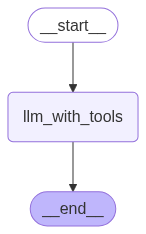

In [30]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

# Node
def llm_with_tools(state: MessagesState):
    return {"messages": [llm_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("llm_with_tools", llm_with_tools)
builder.add_edge(START, "llm_with_tools")
builder.add_edge("llm_with_tools", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [41]:
messages = graph.invoke({"messages": HumanMessage(content="2+3=?")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

2+3=?
================================== Ai Message ==================================

The sum of 2 and 3 is 5.


In [34]:
messages = graph.invoke({"messages": HumanMessage(content="Multiply 2 and 3")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Multiply 2 and 3
================================== Ai Message ==================================
Tool Calls:
  multiply_values (call_4yHGRwa9d7m3HttsdJ2AHzq2)
 Call ID: call_4yHGRwa9d7m3HttsdJ2AHzq2
  Args:
    a: 2
    b: 3
